### **Multiclass Logistic Regression**

* Logistic regression is a machine learning algorithm that predicts the probability of a data point belonging to a particular class. 

* It differs from linear regression by being a classification algorithm rather than a regression one.

* The algorithm uses a logistic (sigmoid) function to map any input value to a probability between 0 and 1, which is then used for classification.

* For problems with more than two classes, the algorithm extends to predict the probability of a data point belonging to one of three or more categories (Multi-class Extension). 

* A common approach for this is "one-vs-rest," where a separate binary model is trained for each class to differentiate it from all other classes.

* Examples of Multi-class Problems:

  * *Iris Classification*: Classifying iris flowers into one of three species: 'setosa', 'versicolor', or 'virginica' based on their features.

  * *Handwritten Digit Recognition*: Identifying handwritten digits from 0 to 9, as shown in the notebook you provided.

  * *Image Classification*: Classifying an image into categories such as 'cat', 'dog', 'bird', or 'fish'.

  * *Product Categorization*: Automatically assigning an e-commerce product to one of several categories like 'electronics', 'clothing', or 'home goods'.

### Step 1: Import Libraries

First, we need to import the necessary libraries. We will use `pandas` for data manipulation, `matplotlib.pyplot` and `seaborn` for data visualization, and `sklearn` for machine learning tasks, including splitting the data, creating the model, and evaluating its performance.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Step 2: Load and Explore the Dataset

* We'll use the Iris flower dataset, which is a classic example for multi-class classification problems. 

* It contains 150 samples of iris flowers, each with four features: sepal length, sepal width, petal length, and petal width. 

* The goal is to classify each flower into one of three species: Setosa, Versicolor, or Virginica. 

* Let's load the dataset and take a quick look at its structure.


In [2]:
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()

In [ ]:
# dir() function list the attributes and methods of the dataset object
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [14]:
# Create a DataFrame for easier exploration
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

In [15]:
# Display the start, middle, and end rows of the dataframe
iris_df.iloc[[1,50,100], :]  

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
1,4.9,3.0,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
100,6.3,3.3,6.0,2.5,2


In [16]:
# Map the target numbers to their names for better readability
iris_df['species_name'] = iris_df['species'].apply(lambda x: iris.target_names[x])

In [17]:
# Display the first 5 rows of the dataframe
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [18]:
# Display the target names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
# Display the start, middle, and end rows of the dataframe
iris_df.iloc[[1,50,100], :] 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
1,4.9,3.0,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
100,6.3,3.3,6.0,2.5,2,virginica


### Step 3: Visualize the Data

* Data visualization is crucial for understanding the relationships between features and classes. 

* For the Iris dataset, we can create scatter plots to see how the different species are separated based on sepal and petal measurements.


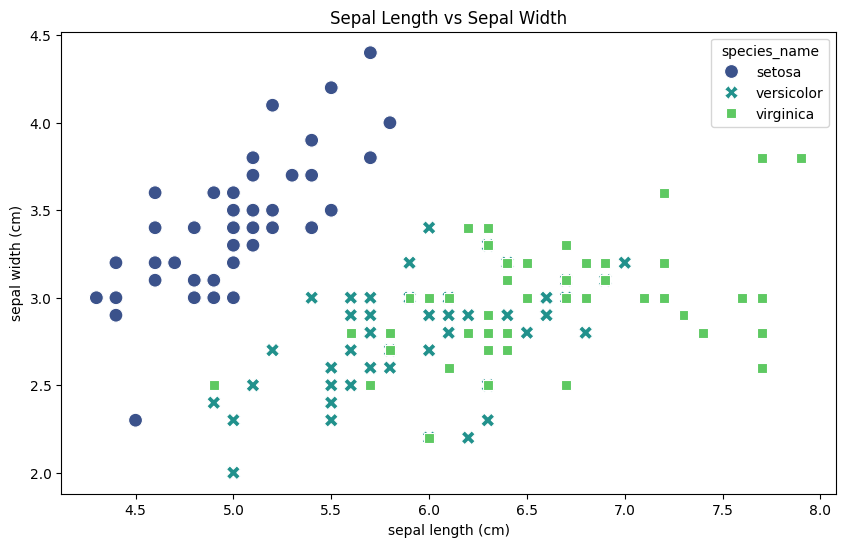

In [20]:
# Scatter plot for sepal length vs sepal width
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=iris_df, 
    x='sepal length (cm)', 
    y='sepal width (cm)', 
    hue='species_name', 
    palette='viridis', 
    style='species_name', 
    s=100
)
plt.title('Sepal Length vs Sepal Width')
plt.show()

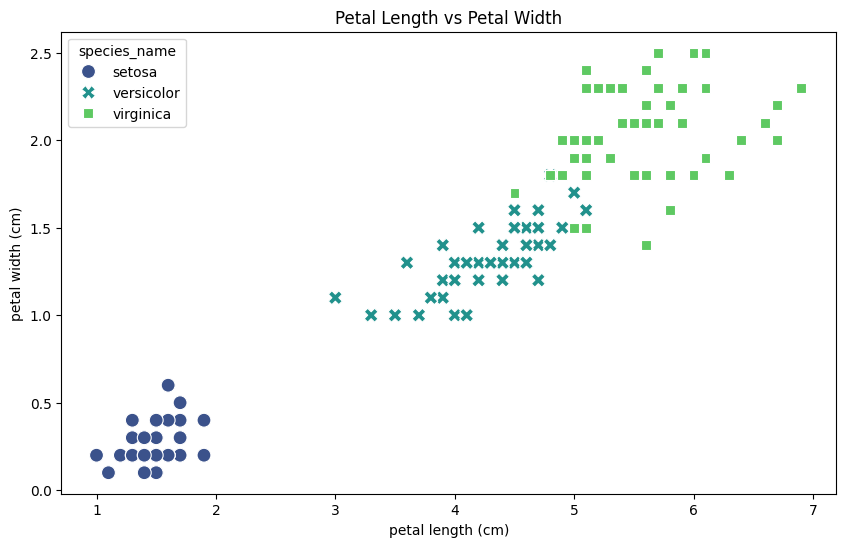

In [21]:
# Scatter plot for petal length vs petal width
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=iris_df, 
    x='petal length (cm)', 
    y='petal width (cm)', 
    hue='species_name', 
    palette='viridis',
    style='species_name',
    s=100
)
plt.title('Petal Length vs Petal Width')
plt.show()

### Step 4: Split Data into Training and Testing Sets

* Before training the model, we need to split the data into a training set and a testing set. 

* The training set is used to train the model, and the testing set is used to evaluate its performance on unseen data. 

* A common split is 80% for training and 20% for testing. 


In [22]:
# Define features (X) and target (y)
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 120 samples
Testing set size: 30 samples


### Step 5: Create and Train Logistic Regression Model

* Now we can create an instance of the `LogisticRegression` model and train it using the training data. 

* The `fit()` method is used for this purpose.


In [24]:
# Create a Logistic Regression model instance
model = LogisticRegression(max_iter=200)

# Train the model using the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


### Step 6: Evaluate Model Performance

* After training, we evaluate the model's performance using the test set. 

* We will calculate the accuracy score and generate a confusion matrix to see how many predictions were correct and where the model made errors.


In [25]:
# Predict the classes for the test set
y_pred = model.predict(X_test)

In [26]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


In [27]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


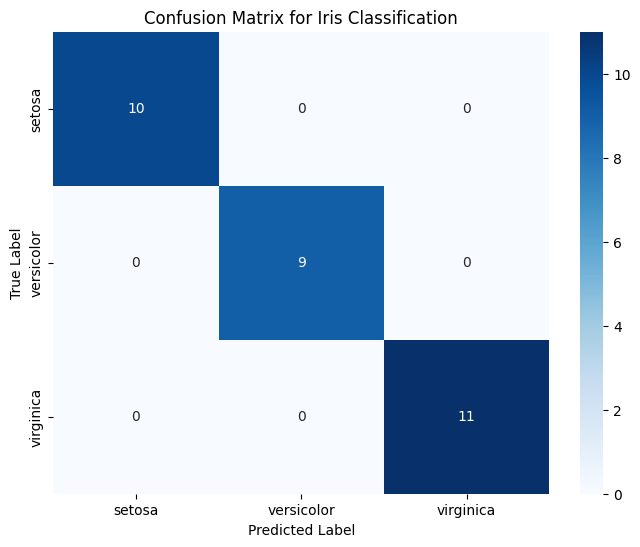

In [28]:
# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Iris Classification')
plt.show()

In [29]:
# Display a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Step 7: Make Predictions for New Data

* We will use our trained model to make predictions on new, unseen data points. 

* For example, let's create a new data point and see what species the model predicts.


In [30]:
# Create a new data point (sepal length, sepal width, petal length, petal width)
# Example of a new data point: [5.1, 3.5, 1.4, 0.2] which corresponds to a Setosa
new_flower = [[5.1, 3.5, 1.4, 0.2]]

# Make a prediction
predicted_class = model.predict(new_flower)
predicted_species = iris.target_names[predicted_class[0]]

print(f"The predicted species for the new flower is: {predicted_species}")

The predicted species for the new flower is: setosa


### Summary

* In this notebook, we have successfully implemented a multi-class logistic regression model using scikit-learn. 

* We covered the entire machine learning pipeline, from data exploration and visualization to model training, evaluation, and prediction. 

* The confusion matrix and accuracy score showed that our model performed exceptionally well on the Iris dataset, achieving perfect accuracy on the test set. 

* This demonstrates the effectiveness of logistic regression for linearly separable multi-class problems.

---

#### **Exercise: Multiclass Classification with Logistic Regression**

### Problem Statement

* The goal of this exercise is to build a machine learning model using Logistic Regression to classify wines into one of three different types. 

* You will use the **Wine Recognition Dataset** from `scikit-learn` library, which contains the results of a chemical analysis of wines grown in the same region in Italy, but derived from three different cultivars.

* Each sample in the dataset has 13 features, such as alcohol content, malic acid, and color intensity.

* Your task is to use these features to train a model that can accurately predict the type (class) of a wine.

---

* Load the Wine dataset from `sklearn.datasets`
* Solution : [Exercise - Multiclass Classification with Logistic Regression]()